In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
%matplotlib inline
import sklearn

In [ ]:
heart = pd.read_csv('/content/heart failur classification dataset.csv')

In [ ]:
heart= heart.assign(target = lambda x : 0)

In [ ]:
heart.head()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,target
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1,0
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1,0
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1,0
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1,0
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
heart['sex'] = enc.fit_transform(heart['sex'])

# Compare the two columns
print(heart[['sex']].head())

   sex
0    1
1    1
2    1
3    1
4    0


In [ ]:
heart_subset = heart[heart['time'].notnull()]

# Print out the shape of the subset
print("Shape after removing null values: ", heart_subset.shape)
print("Shape of dataframe before dropping:", heart.shape)
heart = heart.dropna(axis = 0, subset = ['time'])
print("Shape after dropping:", heart.shape)

Shape after removing null values:  (292, 15)
Shape of dataframe before dropping: (299, 15)
Shape after dropping: (292, 15)


In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(heart[['serum_sodium']])

heart['serum_sodium'] = impute.transform(heart[['serum_sodium']])

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 297
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                292 non-null    int64  
 1   age                       292 non-null    float64
 2   anaemia                   292 non-null    int64  
 3   creatinine_phosphokinase  292 non-null    int64  
 4   diabetes                  292 non-null    int64  
 5   ejection_fraction         292 non-null    int64  
 6   high_blood_pressure       292 non-null    int64  
 7   platelets                 292 non-null    float64
 8   serum_creatinine          292 non-null    float64
 9   serum_sodium              292 non-null    float64
 10  sex                       292 non-null    int64  
 11  smoking                   292 non-null    object 
 12  time                      292 non-null    float64
 13  DEATH_EVENT               292 non-null    int64  
 14  target    

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
heart['smoking'] = enc.fit_transform(heart['smoking'])

# Compare the two columns
print(heart[['smoking']].head())

   smoking
0        0
1        0
2        1
3        0
4        0


In [ ]:
print(heart.isnull().sum())

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
target                      0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

heart['high_blood_pressure'] = enc.fit_transform(heart['high_blood_pressure'])

print(heart['high_blood_pressure'])

0      1
1      0
2      0
3      0
4      0
      ..
293    0
294    1
295    0
296    0
297    0
Name: high_blood_pressure, Length: 292, dtype: int64


In [ ]:
heart = heart.drop(['Unnamed: 0'], axis = 1)
heart.shape

(292, 14)

In [ ]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,target
0,75.0,0,582,0,20,1,265000.00,1.9,136.685315,1,0,4.0,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,1,0,6.0,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,1,1,7.0,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,1,0,7.0,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,0,0,8.0,1,0


In [ ]:
X = heart.drop('high_blood_pressure', axis = 1)
y = heart['high_blood_pressure']

In [ ]:
#Split the data into 80% training and 20% testing
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [ ]:
LR = LogisticRegression().fit(X_train,y_train)

In [ ]:
#Train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train) #Training the model
predictions = model.predict(X_test)
print(predictions)# printing predictions

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:

print( model.score(X_train, y_train))
score_1 = accuracy_score(y_test, predictions)
print (score_1)

0.6372549019607843
0.6477272727272727


In [ ]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2652
X_test- 1144
y_train- 204
y_test- 88


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
predictions=model1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.66      0.97      0.78        58
           1       0.33      0.03      0.06        30

    accuracy                           0.65        88
   macro avg       0.50      0.50      0.42        88
weighted avg       0.55      0.65      0.54        88



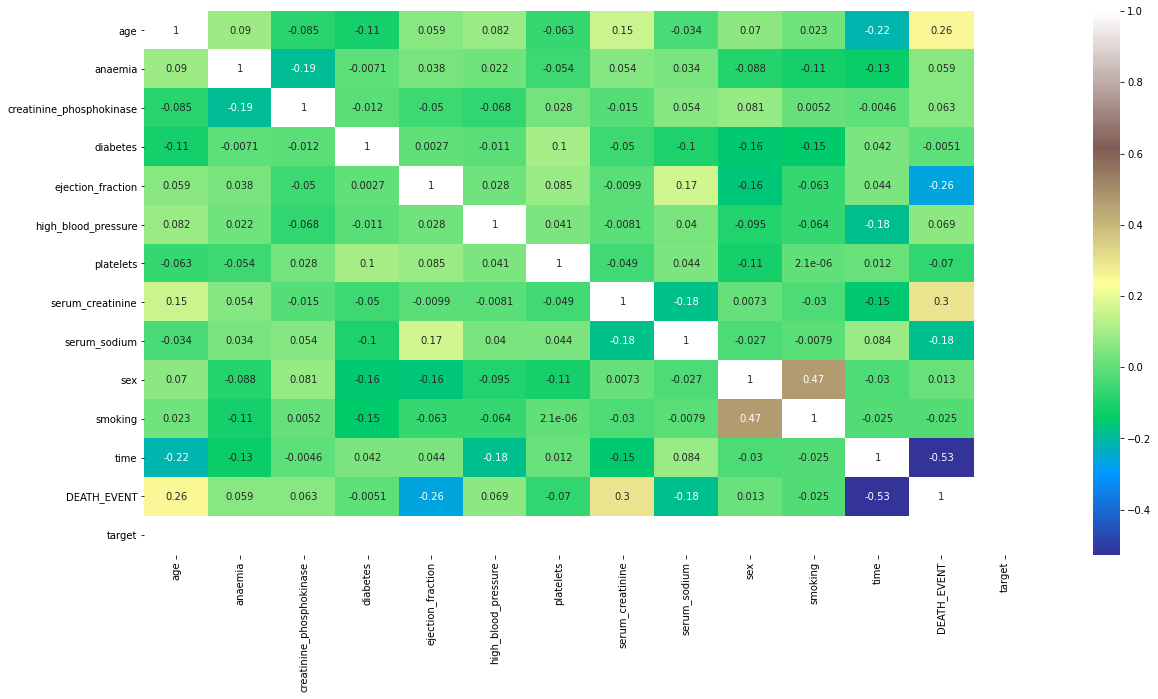

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(heart.corr(), annot=True, cmap='terrain')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
X = heart.iloc[:,1:12]
y = heart.iloc[:,12]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.864406779661017


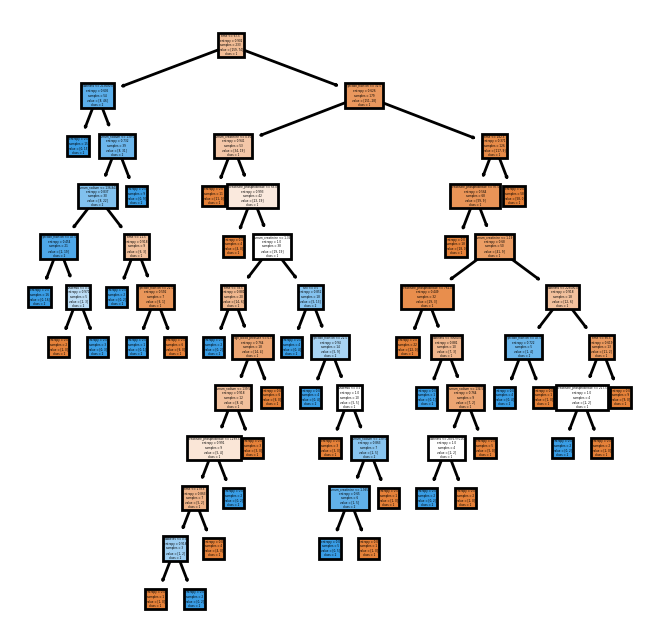

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=200)
tree.plot_tree(clf,
               feature_names = X.columns, 
               class_names=['1','2'],
               filled = True);

                               age   anaemia  ...  DEATH_EVENT  target
age                       1.000000  0.090419  ...     0.257126     NaN
anaemia                   0.090419  1.000000  ...     0.059136     NaN
creatinine_phosphokinase -0.084603 -0.187515  ...     0.063287     NaN
diabetes                 -0.110183 -0.007090  ...    -0.005065     NaN
ejection_fraction         0.058501  0.037690  ...    -0.263698     NaN
high_blood_pressure       0.082202  0.022499  ...     0.068684     NaN
platelets                -0.063488 -0.054290  ...    -0.070449     NaN
serum_creatinine          0.153511  0.053571  ...     0.296866     NaN
serum_sodium             -0.033761  0.034118  ...    -0.182195     NaN
sex                       0.069737 -0.088416  ...     0.012756     NaN
smoking                   0.022816 -0.111909  ...    -0.024754     NaN
time                     -0.216149 -0.132538  ...    -0.526475     NaN
DEATH_EVENT               0.257126  0.059136  ...     1.000000     NaN
target

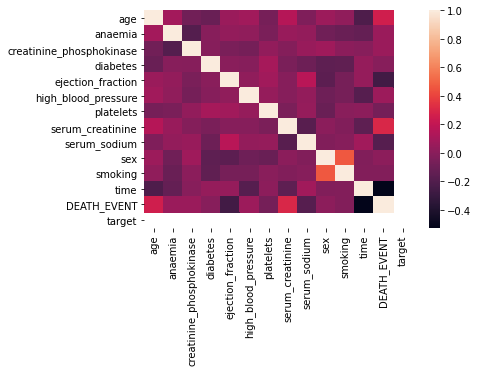

In [ ]:
import seaborn as sns
co = heart.corr() 
print(co)
sns.heatmap(co)

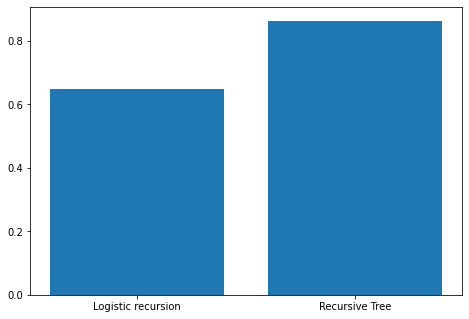

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()

width = 0.55
ax = fig.add_axes([0,0,1,1])
label = ['Logistic recursion', 'Recursive Tree']
percentage = [score_1, score]
ax.bar(label, percentage)

plt.show()

In [ ]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.24.0)


In [ ]:
!python -m pip show scikit-learn 

Name: scikit-learn
Version: 0.24.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, threadpoolctl, joblib, numpy
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute


In [ ]:
heart.keys()

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT', 'target', 'class'],
      dtype='object')

In [ ]:
heart["class"]=heart["DEATH_EVENT"]

In [ ]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,target,class
0,75.0,0,582,0,20,1,265000.00,1.9,136.685315,1,0,4.0,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136.000000,1,0,6.0,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129.000000,1,1,7.0,1,0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137.000000,1,0,7.0,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116.000000,0,0,8.0,1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b1d9a1dd8>,
      dtype=object)

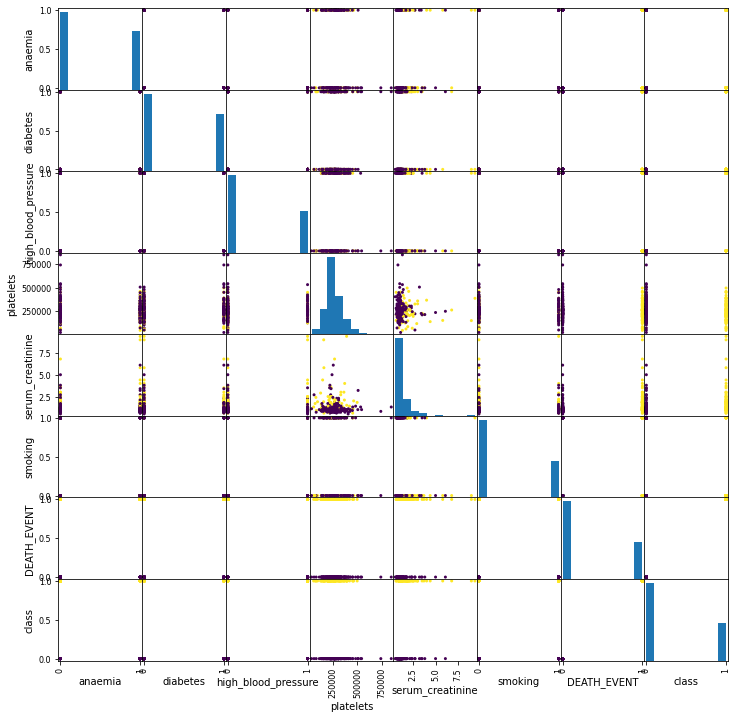

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(heart[['anaemia', 'diabetes',  'high_blood_pressure', 'platelets', 'serum_creatinine',  'smoking',  'DEATH_EVENT',  'class']], c=heart["class"] , figsize=(12,12), alpha=1)

In [ ]:
# X label data
X = heart.drop("class", axis=1)
y= heart["class"]

In [ ]:
#Lets split the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.25)

In [ ]:
print("Training set: x->{} , y->{} \n Testing set: x->{} , y->{}".format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

Training set: x->(219, 14) , y->(219,) 
 Testing set: x->(73, 14) , y->(73,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

AttributeError: ignored

In [ ]:
print("Training accuracy of the model is {:.2f}".format(gnb.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(gnb.score(x_test, y_test)))

NotFittedError: ignored

In [ ]:
predictions = gnb.predict(x_test)
print(predictions)

NotFittedError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

ValueError: ignored

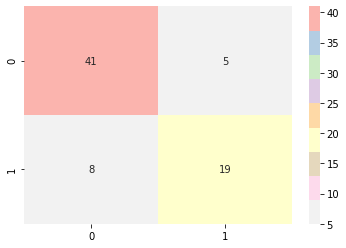

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", annot=True)

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy of the model is 0.82
Testing accuracy of the model is 0.81


In [ ]:
predictions = svc.predict(x_test)
print(predictions)

[1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0
 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[42  7]
 [ 7 17]]


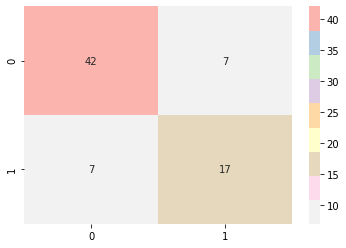

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", annot=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 1.00


In [ ]:
predictions = rfc.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[49  0]
 [ 0 24]]


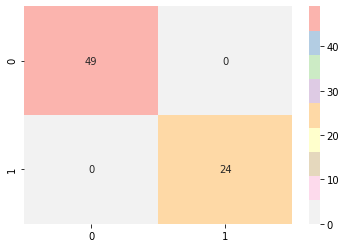

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r",  annot=True)

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(12), activation="relu", max_iter=10000000000)

In [ ]:
nnc.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=12, max_iter=10000000000)

In [ ]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))

The Training accuracy of the model is 0.68
The Testing accuracy of the model is 0.67


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(predictions, y_test)
print(mat)

[[49  0]
 [ 0 24]]


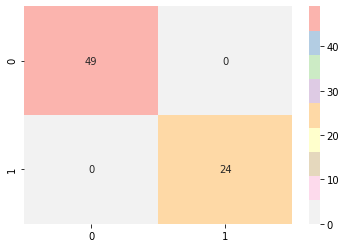

In [ ]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", annot=True)

In [ ]:
from sklearn.linear_model import Ridge
rid= Ridge()
rid.fit(x_train, y_train)

Ridge()